In [45]:
%matplotlib inline
from utils import *
from pylab import *

# number of training patterns
np = 200

c1 =[]
c2 =[]
for a in xrange(0,99) :
    angle = a*((pi*2)/98.0)
    c1.append([2*cos(angle), 2*sin(angle)]) 
    c2.append([.2*cos(angle), .2*sin(angle)]) 

# Training data 
data = build_dataset(np,centroids1=array(c1),centroids2=array(c2),
                    std_deviation=0.05)


#-------------------------------------------------------------------------
# Iput and desired output

# Each row of P is an input pattern
P = data[:,:2]

# Each element of o is the desired output 
# relative to an input pattern
o = data[:,2]

#-------------------------------------------------------------------------


# limits
upper_bound = P.max(0) + 0.2*(P.max(0)-P.min(0))
lower_bound = P.min(0) - 0.2*(P.max(0)-P.min(0))

#-------------------------------------------------------------------------
#-------------------------------------------------------------------------

outfun = tanhfun
derfun = tanhder

#-------------------------------------------------------------------------

# Constants

# Learning rate
eta = 0.005    

# Number of timesteps
stime = np*200  

# number of layer units
nl = array([2,100,1])

# number of layers 
num_layers = len(nl)

# Variables

#-------------------------------------------------------------------------

# Initialize units
units = []
for n in nl :
    units.append(zeros(n))

# Initialize errors
errors = []
for n in nl :
    errors.append(zeros(n))

# Initialize weights
w = []
for no,ni in zip(nl[1:], nl[:-1]):
    w.append(randn(no, ni+1))


#-------------------------------------------------------------------------
    c1.append([2*cos(angle), 2*sin(angle)]) 

# Initialize units history storage
data_u = []
for n in nl :
    data_u.append(zeros([n, stime]))

# Initialize weight history storage
data_w = []
for no,ni in zip(nl[1:], nl[:-1]):
    data_w.append(zeros([(no)*(ni+1), stime]))

# Initialize the error history storage
E = zeros(stime)

#-------------------------------------------------------------------------


# Create a list of pattern indices.
# We will reshuffle it at each 
# repetition of the series
pattern_indices = arange(np)

for t in xrange(stime) :
    
    
    # Reiterate the input pattern 
    # sequence through timesteps
    
    # Reshuffle at the end 
    # of the series
    if t%np == 0:
      shuffle(pattern_indices)
    
    # Current pattern 
    k = pattern_indices[t%np]


    # MAIN STEP CALCULATIONS


    #---------------------------------------------------------------------
    # spreading
 
    # input vector
    p =  P[k]
    
    # linear function
    units[0] = p

    # iterate deep layers
    for layer in xrange(num_layers-1) :
     
        # Bias-plus-input vector
        p =  dot( w[layer], biased(units[layer]) )
        
        # nonlinear function
        units[layer+1] = outfun(p)
     

    #---------------------------------------------------------------------
    # error back-propagation
       
    # the initial outer-error is the real one 
    # (expected vs real outputs)
    errors[-1] = o[k] - units[-1]
        
    # iterate layers backward
    for layer in  xrange(num_layers-1, 0, -1) :
        
        # for each layer evaluate the 
        # back-propagation error
        w_T = (w[layer-1][:,1:]).T
        errors[layer-1] = dot( w_T, errors[layer] )
 

    #---------------------------------------------------------------------
    # Learning

    # iterate layers 
    for layer in  xrange(num_layers-1):
        # error plus derivative
        w[layer] += eta * outer(
                derfun(units[layer+1]) * errors[layer+1],
                biased(units[layer]))


    #---------------------------------------------------------------------
    # Storage

    # store current units
    for d,iu  in zip(data_u, units) :
        d[:,t] = iu
  
    # Store current weights
    for d,iw in zip(data_w, w) :
        d[:,t] = iw.ravel()

    # Store current E
    E[t] = 0.5*errors[-1]**2





Z = zeros([100,100])
X = linspace(lower_bound[0], upper_bound[0],100)
Y = linspace(lower_bound[1], upper_bound[1],100)
XX, YY = meshgrid(X,Y)

for y,j in zip(Y, xrange(100)) :
    for x,i in zip(X, xrange(100)) :
        
        units[0] = array([x,y])

        # iterate deep layers
        for layer in xrange(num_layers-1) :

            # Bias-plus-input vector
            p =  dot( w[layer], biased(units[layer]) )

            # nonlinear function
            units[layer+1] = outfun(p)

        Z[i,j] = units[num_layers-1][0]
  

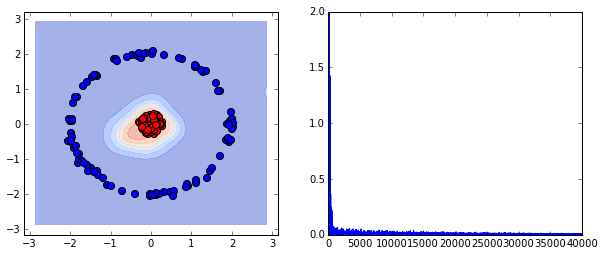

In [46]:
close("all")
fig = figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.contourf(XX,YY,-Z,alpha=0.5,cmap=cm.coolwarm)
ax1.scatter(*P[o<=0,:].T, s=50, c="r")
ax1.scatter(*P[o>0,:].T, s=50, c="b")
ax2 = fig.add_subplot(122)
ax2.plot(E)
show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Next cell is just for styling

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../style/ipybn.css", "r").read()
    return HTML(styles)
css_styling()